In [46]:
%matplotlib inline
import tensorflow as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
from tensorflow import estimator
import pandas as pd
tf.reset_default_graph()
from DataParser import animateGraph


def normalize(df):    
    return (df - df.min()) / (df.max() - df.min())


def denormalize(df,norm_data):    
    return (norm_data * (df.max() - df.min())) + df.min()


def preProcessForTrain(sensor_no):
    sensor=str(sensor_no)
    df = pd.read_csv('./data/finalData/'+sensor+'.csv')
    df['out']=df['out']*1
    df = df.dropna(inplace=False)
    msk = np.random.rand(len(df)) < 0.6
    df_train = df[msk]    
    df_test = df[~msk]
    X_train = normalize(df_train.drop(['out'],axis=1)).values
    y_train = df_train['out'].values
    X_test = normalize(df_test.drop(['out'],axis=1)).values
    y_test = df_test['out'].values
    return X_train, y_train, X_test, y_test


def preProcessForTest(sensor_no):
    sensor=str(sensor_no)
    df = pd.read_csv('./data/finalData/'+sensor+'.csv')
    df['out']=df['out']*1
    df = df.dropna(inplace=False)
    msk = np.random.rand(len(df)) < 1
    df_test = df[msk]
    X_test = normalize(df_test.drop(['out'],axis=1)).values
    y_test = df_test['out'].values
    return X_test, y_test


def preProcessForMergeTrain(filepath):
    df = pd.read_csv(filepath)
    df['out']=df['out']*1
    df = df.dropna(inplace=False)
    msk = np.random.rand(len(df)) < 0.6
    df_train = df[msk]    
    df_test = df[~msk]
    X_train = df_train.drop(['out'],axis=1).values
    y_train = df_train['out'].values
    X_test = df_test.drop(['out'],axis=1).values
    y_test = df_test['out'].values
    return X_train, y_train, X_test, y_test


def preProcessForMergeTest(filepath):
    df = pd.read_csv(filepath)
    df['out']=df['out']*1
    df = df.dropna(inplace=False)
    df_test = df
    X_test = df_test.drop(['out'],axis=1).values
    y_test = df_test['out'].values
    return X_test, y_test

def DNNmodel():
    feat_cols=[tf.feature_column.numeric_column('x', shape=[960])]
    return tf.estimator.DNNClassifier(feature_columns=feat_cols, 
                                      n_classes=2,
                                      hidden_units=[2000,2000,2000,2000,2000,2000], 
                                      activation_fn=tf.nn.relu,
                                      optimizer=tf.train.GradientDescentOptimizer(0.0001),
                                      model_dir='./model')


def training(X_train, y_train):
    deep_model=DNNmodel()
    input_fn = estimator.inputs.numpy_input_fn(x={'x':X_train}, 
                                           y=y_train,
                                           shuffle= True,
                                           num_epochs=5000,
                                           batch_size=100)
    return deep_model.train(input_fn=input_fn, steps=50000)


def evaluate(X_test, y_test):   
    input_fn_eval = estimator.inputs.numpy_input_fn( x = {'x':X_test},
                                                y =  y_test,
                                                shuffle = False)
    deep_model=DNNmodel()
    
    return dict(deep_model.evaluate(input_fn=input_fn_eval))


def predict(X_test):
    
    input_fn_eval = estimator.inputs.numpy_input_fn( x = {'x':X_test},
                                                shuffle = False)
    deep_model = DNNmodel()
    preds=list(deep_model.predict(input_fn=input_fn_eval))
    predictions = [p['class_ids'][0] for p in preds]
    pred = np.asarray(predictions)
    return pred    


def checkAccuracy(pred, y_test):
    f = pred == y_test
    T = len(f[f == True])
    F = len(f[f == False])
    error = F/(T+F) * 100
    return T, F, error 

In [44]:
X_train, y_train, X_test, y_test = preProcessForMergeTrain()

In [50]:
train = training(X_train, y_train)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_train_distribute': None, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './model', '_master': '', '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_session_config': None, '_task_type': 'worker', '_global_id_in_cluster': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdfc2f45cc0>, '_evaluation_master': '', '_task_id': 0, '_num_worker_replicas': 1, '_service': None}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/model.ckpt-60000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Error reported to Coordinator

InternalError: Unable to get element as bytes.

In [31]:
eval = evaluate(X_test, y_test)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_train_distribute': None, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './model', '_master': '', '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_session_config': None, '_task_type': 'worker', '_global_id_in_cluster': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdff17685f8>, '_evaluation_master': '', '_task_id': 0, '_num_worker_replicas': 1, '_service': None}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-11-09:51:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/model.ckpt-60000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evalu

In [32]:
pred = predict(X_test)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_train_distribute': None, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './model', '_master': '', '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_session_config': None, '_task_type': 'worker', '_global_id_in_cluster': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe05c76eda0>, '_evaluation_master': '', '_task_id': 0, '_num_worker_replicas': 1, '_service': None}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/model.ckpt-60000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [33]:
T, F, error = checkAccuracy(pred, y_test)

In [34]:
print(T, F, error)

6925 268 3.725844571110802


In [96]:
df = pd.read_csv('./data/finalData/.csv')
df1 = pd.DataFrame(pred)
df['pred'] = df1==1
df.to_csv('./data/finalDataWithPred/1607.csv')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100


NameError: name 'HTML' is not defined

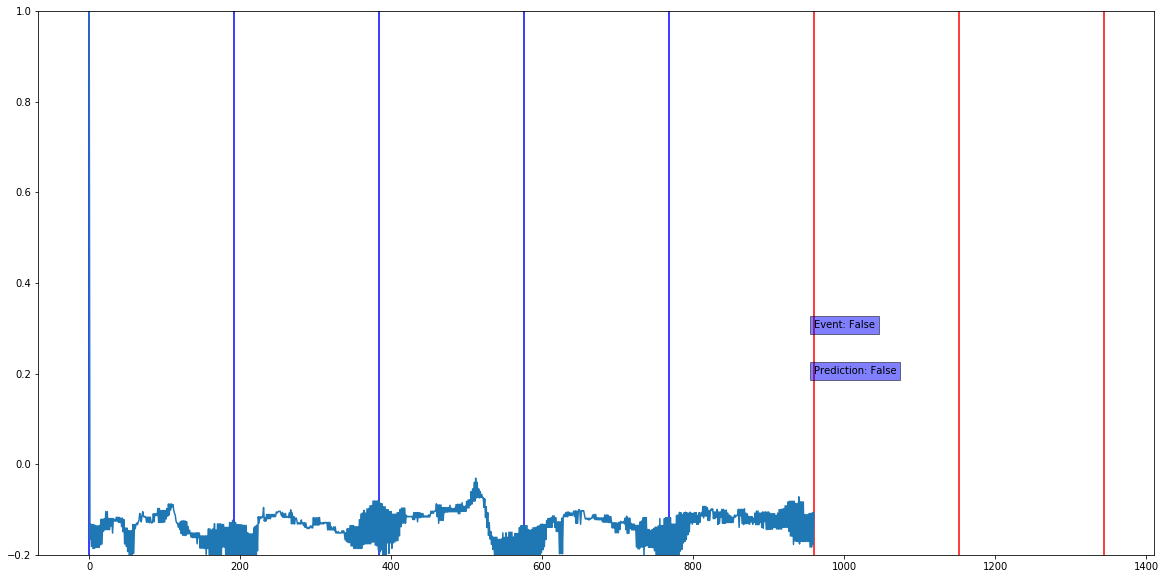

In [97]:
animateGraph('./data/finalDataWithPred/1607.csv')

In [26]:
def exportResult(predict, 1612):

In [33]:
    df = pd.read_csv('./data/finalData/1612.csv')

In [36]:
    df1 = pd.DataFrame(pred)

In [52]:
    df['pred'] = df1==1

In [59]:
    df.to_csv('./data/finalDataWithPred/1612.csv')